In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import seaborn as sns

# Creating circle data 100 points

In [6]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=100, noise=0.1, random_state=1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [12]:
X_train.shape

(80, 2)

/home/koushik/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

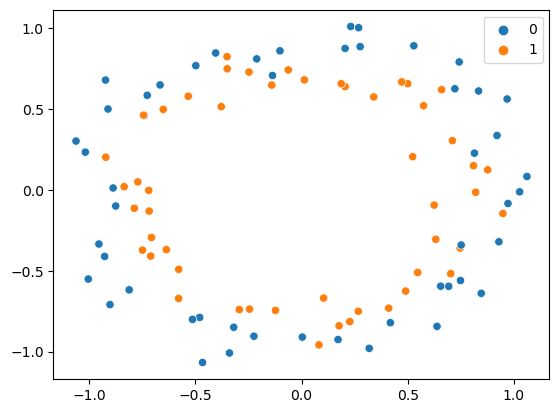

In [15]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

In [16]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation ="sigmoid"))


2022-11-25 19:45:17.263975: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-25 19:45:17.273655: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-25 19:45:17.273718: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (koushik-HP-Pavilion-Laptop-15-cs3xxx): /proc/driver/nvidia/version does not exist
2022-11-25 19:45:17.299080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [19]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=1000, verbose=0 )

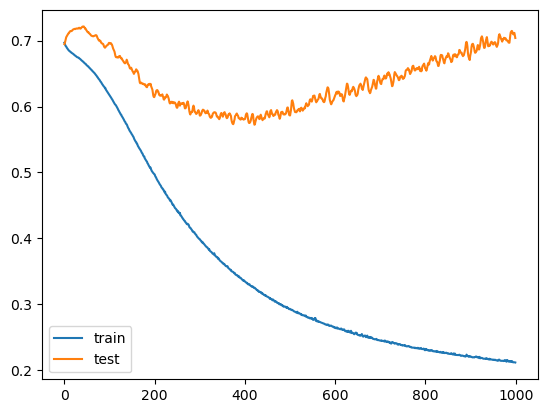

In [23]:
plt.plot(history.history['loss'], label ='train')
plt.plot(history.history['val_loss'], label ='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 6s 653us/step


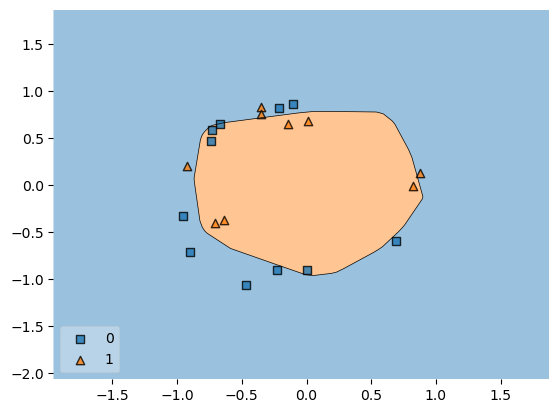

In [28]:
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=3)
plt.show()

In [29]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 28ms/step - loss: 0.2117 - accuracy: 0.9125 - val_loss: 0.7025 - val_accuracy: 0.6000
Epoch 2/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.2116 - accuracy: 0.9000 - val_loss: 0.7010 - val_accuracy: 0.6000
Epoch 3/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.2115 - accuracy: 0.9125 - val_loss: 0.6997 - val_accuracy: 0.6000
Epoch 4/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.2115 - accuracy: 0.9125 - val_loss: 0.7019 - val_accuracy: 0.6000
Epoch 5/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.2115 - accuracy: 0.9000 - val_loss: 0.7017 - val_accuracy: 0.6000
Epoch 6/3500
3/3 [==============================] - 0s 15ms/step - loss: 0.2110 - accuracy: 0.9125 - val_loss: 0.7036 - val_accuracy: 0.6000
Epoch 7/3500
3/3 [==============================] - 0s 14ms/step - loss: 0.2113 - accuracy: 0.9125 - val_loss: 0.7037 - val_accuracy: 0.6000
Epoch 8/3500


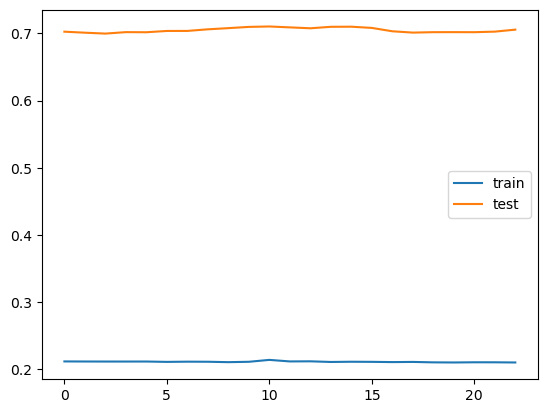

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 [==============================] - 7s 733us/step


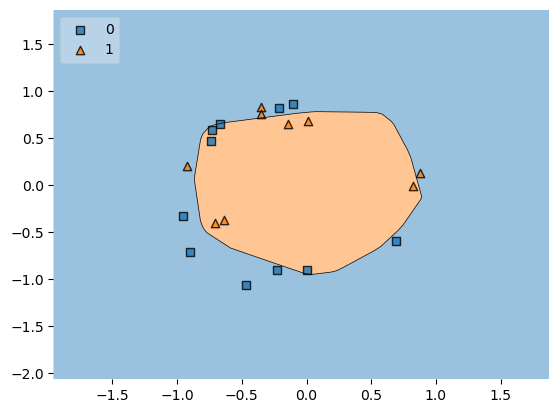

In [32]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()